In [1]:
import torch
import random
import matplotlib.pyplot as plt
from matplotlib import gridspec
from torchvision import transforms

In [2]:
from torch.utils.data import DataLoader

In [3]:
from utils import OmniglotDataset, NWayOneShotEvalSet, split_drawers, split_alphabets, create_data_dict

In [4]:
random_seed = 0
torch.manual_seed(random_seed)

ROOT_DIR = './dataset/images_background/'
idx_drawers = split_drawers()
idx_alps = split_alphabets()

In [5]:
idx_drawers

{'eval': array([18,  1, 19,  8, 10, 17,  6, 13]),
 'test': array([17, 19,  8, 10]),
 'valid': [1, 18, 13, 6]}

In [6]:
idx_alps

{'valid': [11, 10, 16, 8, 4, 14, 12, 0, 15, 1],
 'test': [2, 3, 5, 6, 7, 9, 13, 17, 18, 19]}

## Verification Dataset

In [7]:
BackgroundDataset = OmniglotDataset(root_dir=ROOT_DIR, drawers= idx_drawers['eval'], size = 6, transform=None)

creating paired dataset...
6 pairs created.


In [58]:
img = Image.open("./dataset/images_background/Alphabet_of_the_Magi/character01/0709_20.png").convert("L")

In [59]:
import numpy as np

In [60]:
np.array(img)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

(105, 105) (105, 105)
(105, 105) (105, 105)
(105, 105) (105, 105)
(105, 105) (105, 105)
(105, 105) (105, 105)
(105, 105) (105, 105)


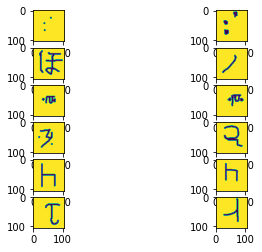

In [8]:
rows = len(BackgroundDataset)
for i in range(1,2*rows,2):
    img1, img2, label = BackgroundDataset[int((i-1)/2)]
    print(img1.size, img2.size)
    ax = plt.subplot(rows, 2, i)
    ax = plt.imshow(img1)
    ax = plt.subplot(rows, 2, i+1)
    ax = plt.imshow(img2)

## One-shot Learning Dataset

In [31]:
EvalDataset = NWayOneShotEvalSet(root_dir='./dataset/images_evaluation/',\
                                         idx_alps=idx_alps['valid'], idx_drawers=idx_drawers['valid'],\
                                         numWay=20, numTrials = 1, transform=None)

creating 20 way one shot evaluation dataset...
1 trials created


In [32]:
len(EvalDataset)

400

In [33]:
k = 5

tensor([16.])


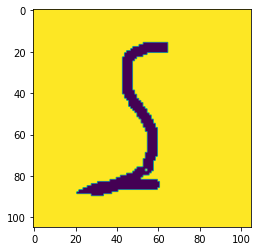

In [34]:
input_img, ways_img, label = EvalDataset[k]
print(label)
plt.imshow(input_img)

In [21]:
transformer = transforms.ToTensor()

(105, 105) 20 tensor([16.])


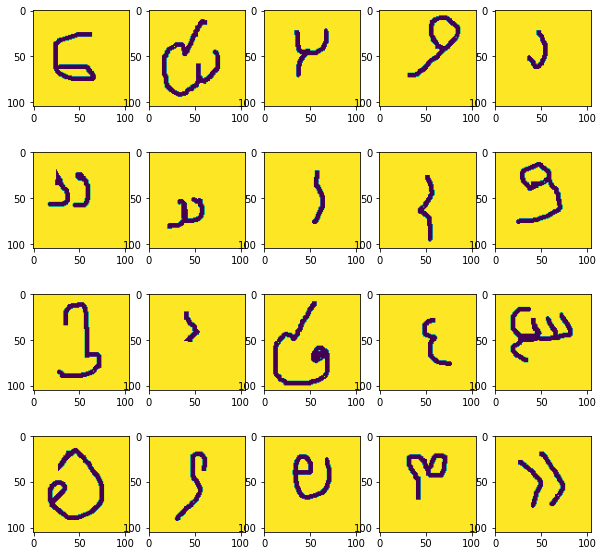

In [35]:
rows = 3
fig, axs = plt.subplots(nrows=4, ncols=5, figsize=(10,10))
print(input_img.size, len(ways_img), label)
input_img, ways_img, label = EvalDataset[k]
for i in range(4):
    ax = axs[i]
    for j in range(5):
        ax[j].imshow(ways_img[i*5 + j])        

# Check it with the DataLoader

In [14]:
BackgroundDataset = OmniglotDataset(root_dir=ROOT_DIR, drawers= idx_drawers['eval'], size = 6, transform=transforms.ToTensor())

creating paired dataset...
6 pairs created.


In [36]:
EvalDataset = NWayOneShotEvalSet(root_dir='./dataset/images_evaluation/',\
                                         idx_alps=idx_alps['valid'], idx_drawers=idx_drawers['valid'],\
                                         numWay=20, numTrials = 1, transform=transforms.ToTensor())

creating 20 way one shot evaluation dataset...
1 trials created


In [16]:
TrainLoader = DataLoader(BackgroundDataset, batch_size = 4, shuffle=True)

In [37]:
EvalLoader = DataLoader(EvalDataset, batch_size = 2, shuffle=False)

In [18]:
next(iter(TrainLoader))

[tensor([[[[1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           ...,
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.]]],
 
 
         [[[1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           ...,
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.]]],
 
 
         [[[1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           ...,
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.]]],
 
 
         [[[1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           ...,
           [1.,

In [38]:
next(iter(EvalLoader))

[tensor([[[[1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           ...,
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.]]],
 
 
         [[[1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           ...,
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.]]]]),
 [tensor([[[[1., 1., 1.,  ..., 1., 1., 1.],
            [1., 1., 1.,  ..., 1., 1., 1.],
            [1., 1., 1.,  ..., 1., 1., 1.],
            ...,
            [1., 1., 1.,  ..., 1., 1., 1.],
            [1., 1., 1.,  ..., 1., 1., 1.],
            [1., 1., 1.,  ..., 1., 1., 1.]]],
  
  
          [[[1., 1., 1.,  ..., 1., 1., 1.],
            [1., 1., 1.,  ..., 1., 1., 1.],
            [1., 1., 1.,  ..., 1., 1., 1.],
            ...,
    